In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Relative path to the data
DATA_PATH = '../dataset/electricity_cost_dataset.csv'

# Importing data and first observations
df = pd.read_csv(DATA_PATH)
print("---------------------------------")
print("Basic Info of each data column: ")
print("---------------------------------")
print(df.info())

print("\n\n---------------------------------")
print("Description of the data set")
print("---------------------------------")
print(df.describe())

print("\n\n---------------------------------")
print("Dataset -- ")
print("---------------------------------")
print(df.head())

# All the observations are noted in the documentation/observations.md

---------------------------------
Basic Info of each data column: 
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB
None


---------------------------------
Description of the data set
---------------------------------
          site area  water consumption  recycling rate  utilisat

[]

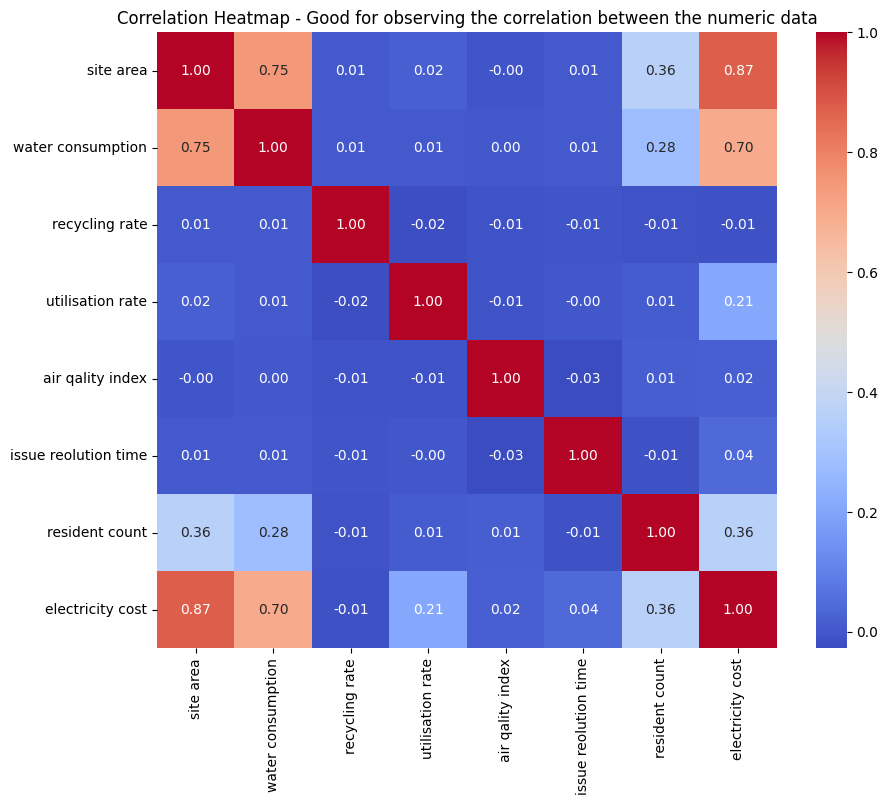

In [4]:
# Exploratory Data Analysis

## Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap - Good for observing the correlation between the numeric data')
plt.plot()

[]

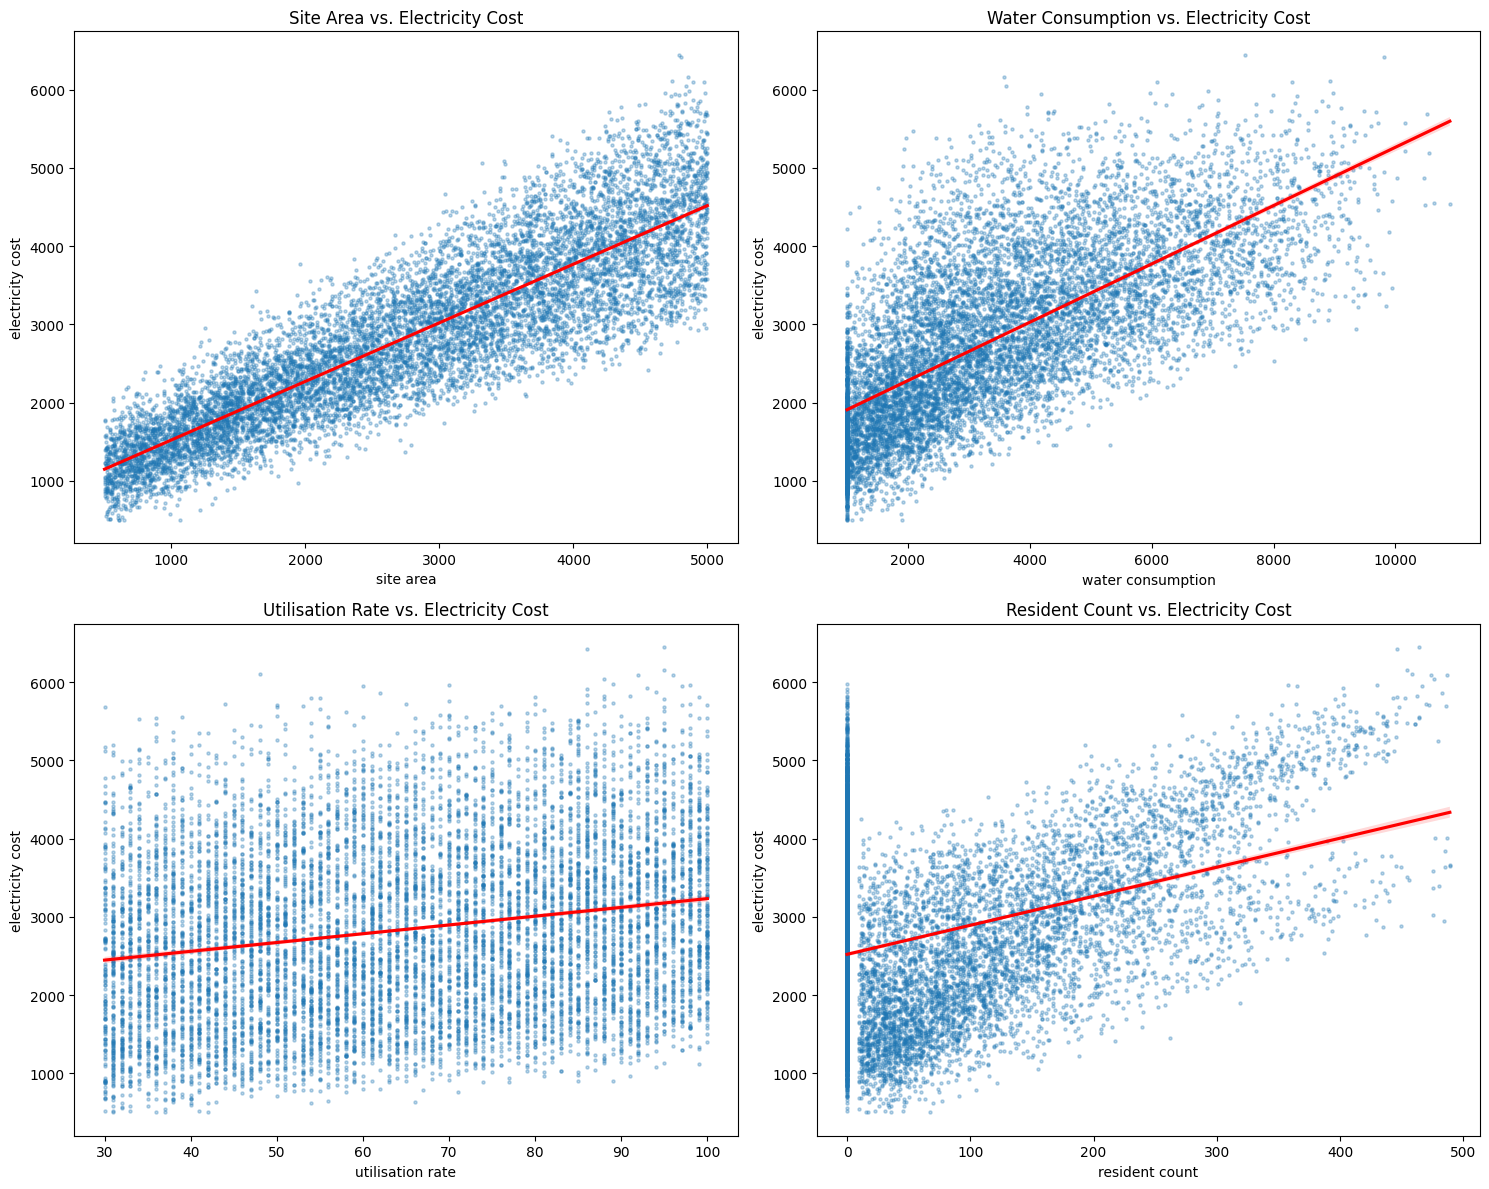

In [9]:
# Scatter plots 
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.regplot(data=df, 
            x='site area', 
            y='electricity cost',
            ax=axes[0,0],
            scatter_kws={'s': 5, 'alpha': 0.3},
            line_kws={'color' : 'red'})
axes[0,0].set_title('Site Area vs. Electricity Cost')

sns.regplot(data=df, 
            x='water consumption', 
            y='electricity cost',
            ax=axes[0,1],
            scatter_kws={'s': 5, 'alpha': 0.3},
            line_kws={'color' : 'red'})
axes[0,1].set_title('Water Consumption vs. Electricity Cost')

sns.regplot(data=df, 
            x='utilisation rate', 
            y='electricity cost',
            ax=axes[1,0],
            scatter_kws={'s': 5, 'alpha': 0.3},
            line_kws={'color' : 'red'})
axes[1,0].set_title('Utilisation Rate vs. Electricity Cost')

sns.regplot(data=df, 
            x='resident count', 
            y='electricity cost',
            ax=axes[1,1],
            scatter_kws={'s': 5, 'alpha': 0.3},
            line_kws={'color' : 'red'})
axes[1,1].set_title('Resident Count vs. Electricity Cost')

plt.tight_layout()
plt.plot()


  structure type  low_resident  electricity cost
0     Commercial          True       2812.206988
1     Industrial          True       3397.109562
2      Mixed-use         False       2304.945906
3    Residential         False       2992.465347


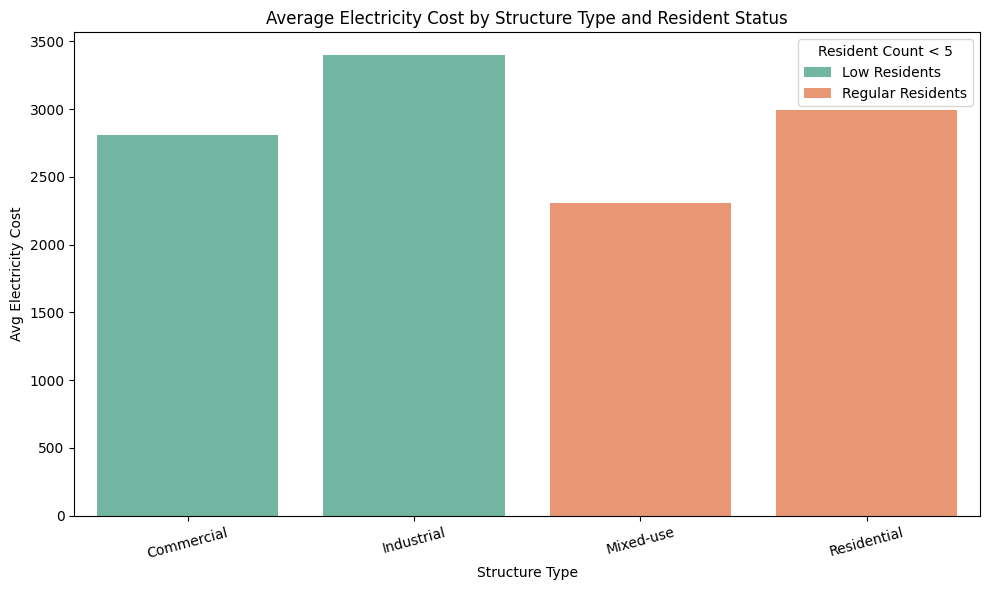

In [6]:
df['low_resident'] = (df['resident count'] < 5)
avg_cost = df.groupby(['structure type', 'low_resident'])['electricity cost'].mean().reset_index()
print(avg_cost)
avg_cost['Resident Category'] = avg_cost['low_resident'].map({True: 'Low Residents', False: 'Regular Residents'})


plt.figure(figsize=(10, 6))
sns.barplot(data=avg_cost, 
            x='structure type', 
            y='electricity cost', 
            hue='Resident Category',
            palette='Set2')

plt.title("Average Electricity Cost by Structure Type and Resident Status")
plt.ylabel("Avg Electricity Cost")
plt.xlabel("Structure Type")
plt.legend(title="Resident Count < 5")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [7]:
df = df.drop('low_resident', axis=1)
res_df = df[df['structure type'] == 'Residential']
com_df = df[df['structure type'] == 'Commercial']
ind_df = df[df['structure type'] == 'Industrial']
mix_df = df[df['structure type'] == 'Mixed-use']

[]

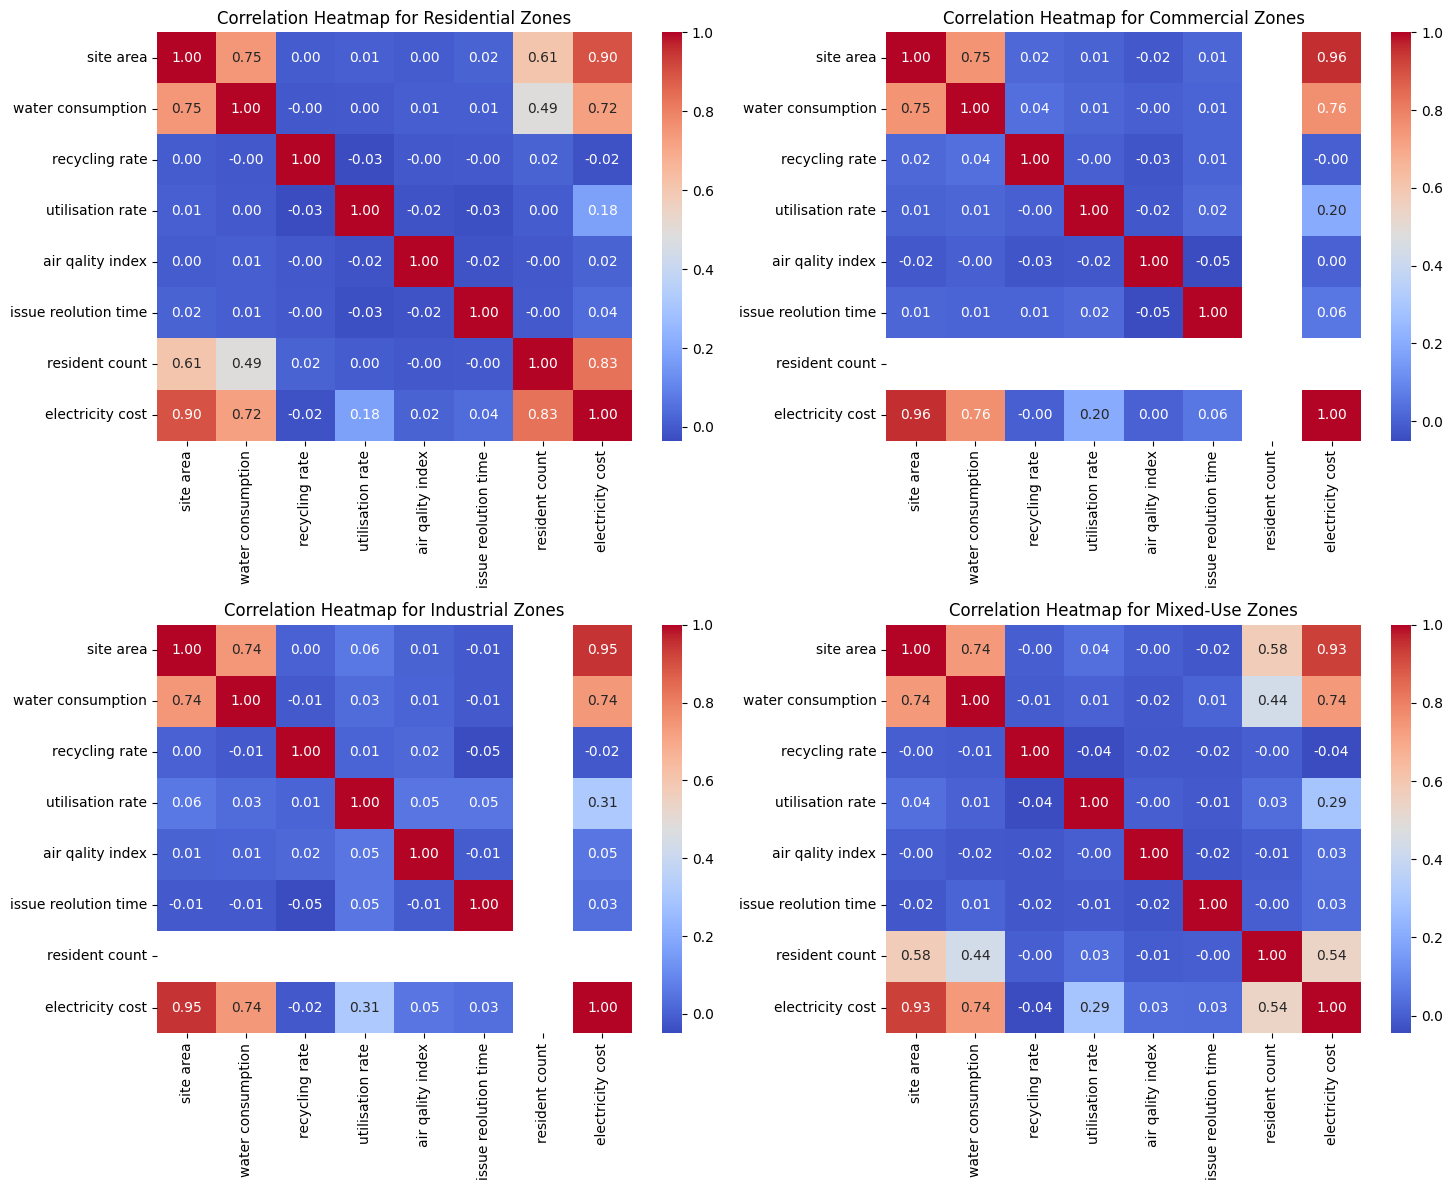

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.heatmap(res_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0,0])
axes[0,0].set_title('Correlation Heatmap for Residential Zones')

sns.heatmap(com_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', ax=axes[0,1])
axes[0,1].set_title('Correlation Heatmap for Commercial Zones')

sns.heatmap(ind_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1,0])
axes[1,0].set_title('Correlation Heatmap for Industrial Zones')

sns.heatmap(mix_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Correlation Heatmap for Mixed-Use Zones')

plt.tight_layout()
plt.plot()